# DECISION TREE USING C5.0 (fraudcheck)

In [271]:
import pandas as pd 
import numpy as np
#from sklearn import datasets
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [272]:
#read the file
fraud=pd.read_csv('Fraud_check.csv')

In [273]:
fraud


,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [274]:
##Complete Iris dataset by converting into binary values(0 &1)
#martial status
label_encoder=preprocessing.LabelEncoder()
fraud['Marital.Status']=label_encoder.fit_transform(fraud['Marital.Status'])
fraud['Marital.Status']

0      2
1      0
2      1
3      2
4      1
      ..
595    0
596    0
597    0
598    1
599    0
Name: Marital.Status, Length: 600, dtype: int32

In [275]:
#Urban
label_encoder=preprocessing.LabelEncoder()
fraud['Urban']=label_encoder.fit_transform(fraud['Urban'])
fraud['Urban']

0      1
1      1
2      1
3      1
4      0
      ..
595    1
596    1
597    1
598    0
599    0
Name: Urban, Length: 600, dtype: int32

In [276]:
#Undergrad
label_encoder=preprocessing.LabelEncoder()
fraud['Undergrad']=label_encoder.fit_transform(fraud['Undergrad'])
fraud['Undergrad']

0      0
1      1
2      0
3      1
4      0
      ..
595    1
596    1
597    0
598    1
599    0
Name: Undergrad, Length: 600, dtype: int32

In [277]:
x=fraud.iloc[:,0:4]
y=fraud['Urban']
x

,Undergrad,Marital.Status,Taxable.Income,City.Population
0,0,2,68833,50047
1,1,0,33700,134075
2,0,1,36925,160205
3,1,2,50190,193264
4,0,1,81002,27533
...,...,...,...,...
595,1,0,76340,39492
596,1,0,69967,55369
597,0,0,47334,154058
598,1,1,98592,180083


In [278]:
#no of observations
fraud.Urban.value_counts()

1    302
0    298
Name: Urban, dtype: int64

In [279]:
#number of columns 
colnames=list(fraud.columns)

In [280]:
#column names
colnames

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban']

In [281]:
fraud["TaxInc"] = pd.cut(fraud["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])
fraud["TaxInc"]


0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: TaxInc, Length: 600, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [282]:
fraud.loc[fraud["Taxable.Income"]>=30000,"income"]="Good"
fraud.loc[fraud["Taxable.Income"]<=30000,"income"]="Risky"

In [283]:
#splitting data into training and testing 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,train_size=0.8,random_state=42)

In [284]:
#building decison tree classfier using c5.0
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=3)

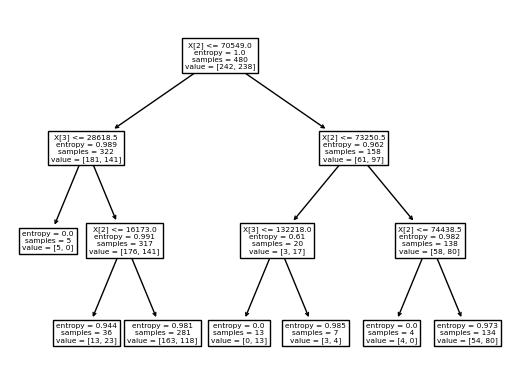

In [285]:
#plot the decison tree model
tree.plot_tree(model);


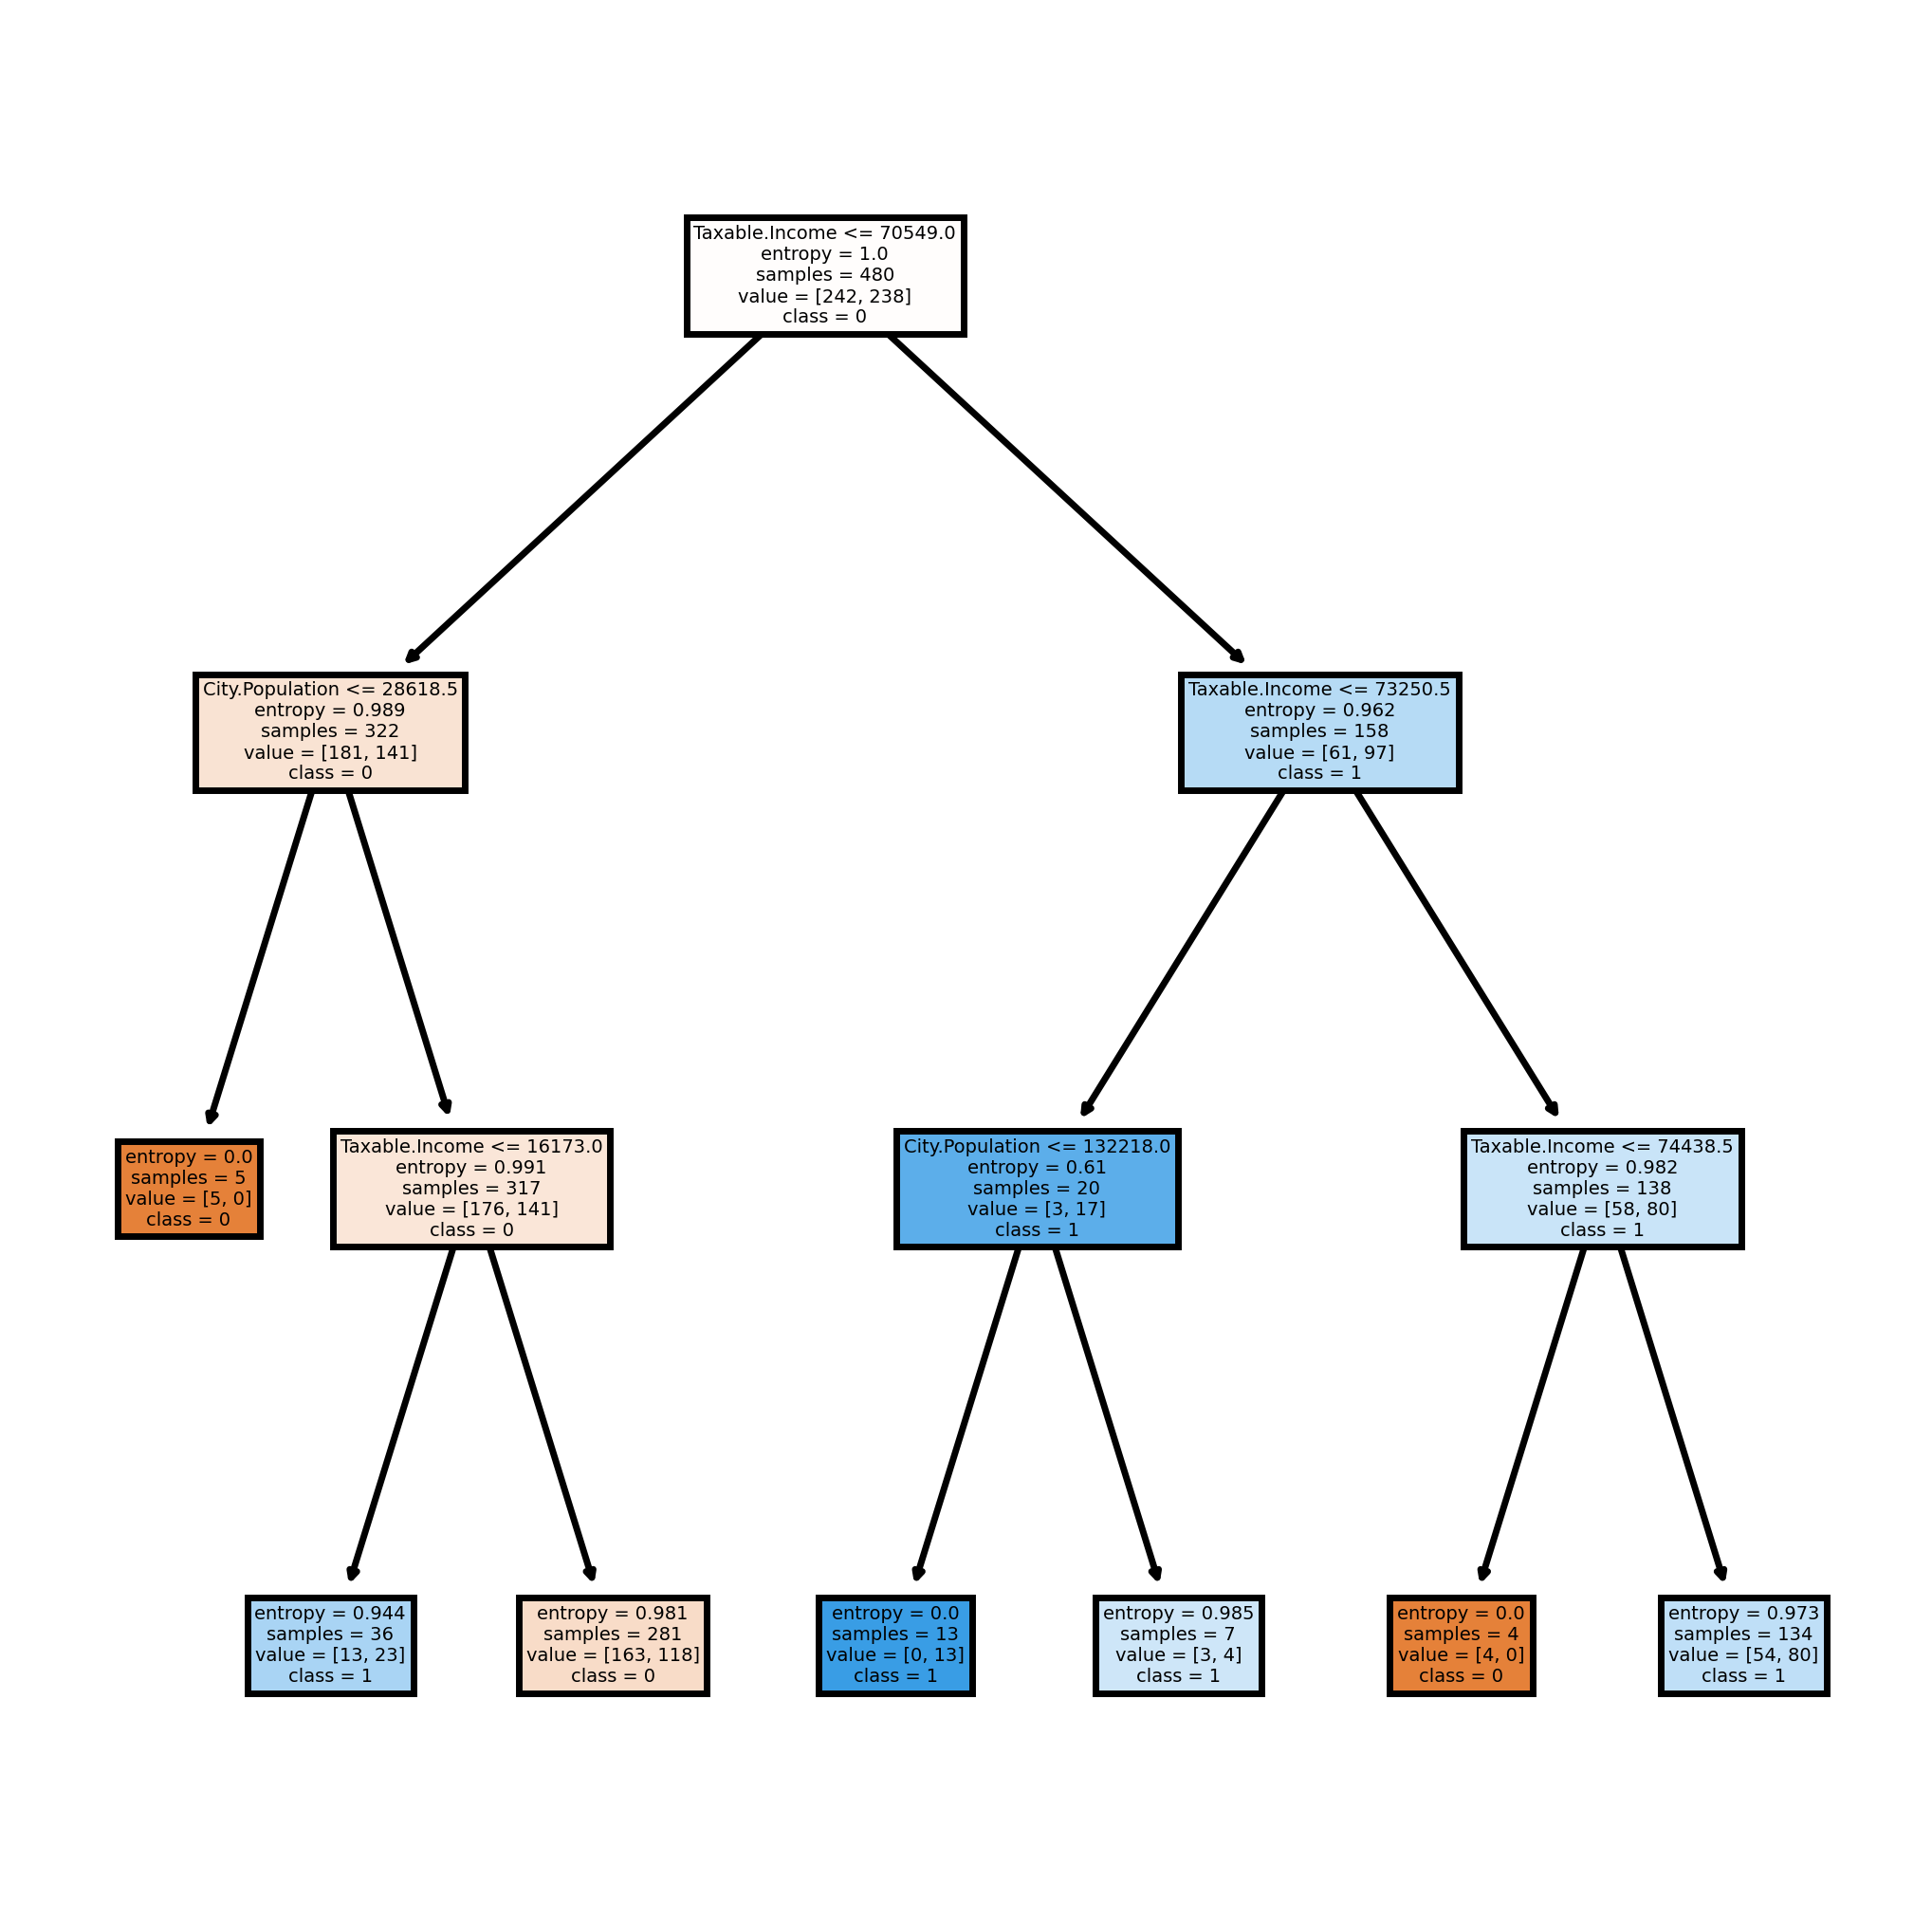

In [286]:
#decison tree
import matplotlib.pyplot as plt

fn=['Undergrad','Marital.Status','Taxable.Income','City.Population']
cn=['0','1']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(5,5),dpi=500)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True);

In [287]:
#imp features to find
model.feature_importances_

array([0.        , 0.        , 0.71206259, 0.28793741])

In [288]:
#to find values in imp features
import pandas as pd
features_imp=pd.Series(model.feature_importances_,index=fn).sort_index(ascending=False)
features_imp


Undergrad          0.000000
Taxable.Income     0.712063
Marital.Status     0.000000
City.Population    0.287937
dtype: float64

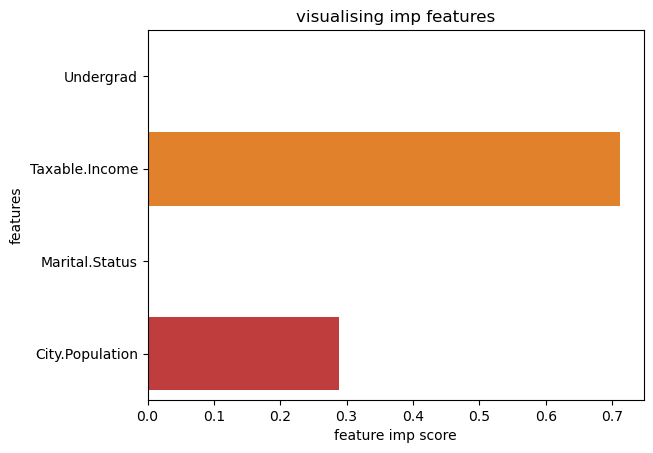

In [289]:
#plot the imp features
import matplotlib.pyplot as plt 
import seaborn as sns
sns.barplot(x=features_imp,y=features_imp.index)
plt.xlabel('feature imp score')
plt.ylabel('features')
plt.title('visualising imp features')
plt.show()

In [290]:
#apply on testing dataset
preds=model.predict(x_test)
pd.Series(preds).value_counts()


0    78
1    42
dtype: int64

In [291]:
preds


array([0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0])

In [292]:
#compare actual value with predicted value
pd.crosstab(y_test,preds)

col_0,0,1
Urban,,
0,40,16
1,38,26


In [293]:
#accuarcy
np.mean(preds==y_test)

0.55

# DECISION TREE USING CART(GINI)
# CLASSIFICATION(fraudcheck)

In [294]:
#building decison tree classfier using gini (cart)
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion = 'gini',max_depth=3)
model_gini.fit(x_train,y_train) 

DecisionTreeClassifier(max_depth=3)

In [295]:
#imp features to find
model_gini.feature_importances_

array([0.        , 0.23364034, 0.6881789 , 0.07818075])

In [296]:
#apply on testing dataset
preds=model_gini.predict(x_test)
pd.Series(preds).value_counts()

0    78
1    42
dtype: int64

In [297]:
#compare actual value with predicted value
pd.crosstab(y_test,preds)

col_0,0,1
Urban,,
0,40,16
1,38,26


In [298]:
#accuarcy
np.mean(preds==y_test)

0.55

# DECISION TREE USING CART
# REGRESSION(fraudcheck)

In [327]:
array = fraud.values
X = array[:,0:3]
y = array[:,3]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
model1 = DecisionTreeRegressor()
model1.fit(X_train, y_train)
DecisionTreeRegressor()
# Checking the accuracy
model1.score(X_test,y_test) 

-1.1910113145005008

# DECISION TREE USING C5.0 (companydata)

In [299]:
import pandas as pd 
import numpy as np
#from sklearn import datasets
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [300]:
#read the file
company=pd.read_csv('Company_Data.csv')
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [301]:
#converting into binary values (0 & 1)
#shelveloc
label_encoder=preprocessing.LabelEncoder()
company['ShelveLoc']=label_encoder.fit_transform(company['ShelveLoc'])
company['ShelveLoc']

0      0
1      1
2      2
3      2
4      0
      ..
395    1
396    2
397    2
398    0
399    1
Name: ShelveLoc, Length: 400, dtype: int32

In [302]:
#urban
label_encoder=preprocessing.LabelEncoder()
company['Urban']=label_encoder.fit_transform(company['Urban'])
company['Urban']

0      1
1      1
2      1
3      1
4      1
      ..
395    1
396    0
397    1
398    1
399    1
Name: Urban, Length: 400, dtype: int32

In [303]:
#US
label_encoder=preprocessing.LabelEncoder()
company['US']=label_encoder.fit_transform(company['US'])
company['US']

0      1
1      1
2      1
3      1
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: US, Length: 400, dtype: int32

In [304]:
#splitting values into x and y
x=company.iloc[:,0:4]
y=company['US']

In [305]:
x

,Sales,CompPrice,Income,Advertising
0,9.50,138,73,11
1,11.22,111,48,16
2,10.06,113,35,10
3,7.40,117,100,4
4,4.15,141,64,3
...,...,...,...,...
395,12.57,138,108,17
396,6.14,139,23,3
397,7.41,162,26,12
398,5.94,100,79,7


In [306]:
#number of observations
company.US.value_counts()

1    258
0    142
Name: US, dtype: int64

In [307]:
#number of columns
colnames=list(company.columns)

In [308]:
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [309]:
#splitting data into training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [310]:
#buliding decision tree classfier using c5.0
from sklearn.tree  import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

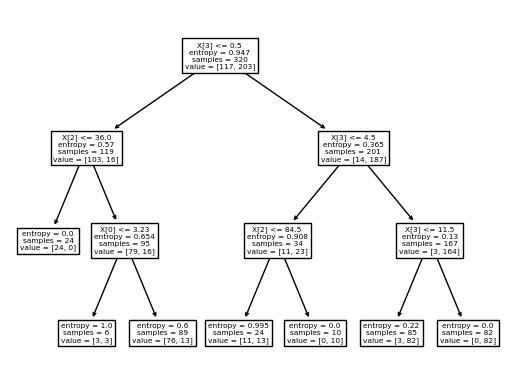

In [311]:
#plot the decision tree model
tree.plot_tree(model);

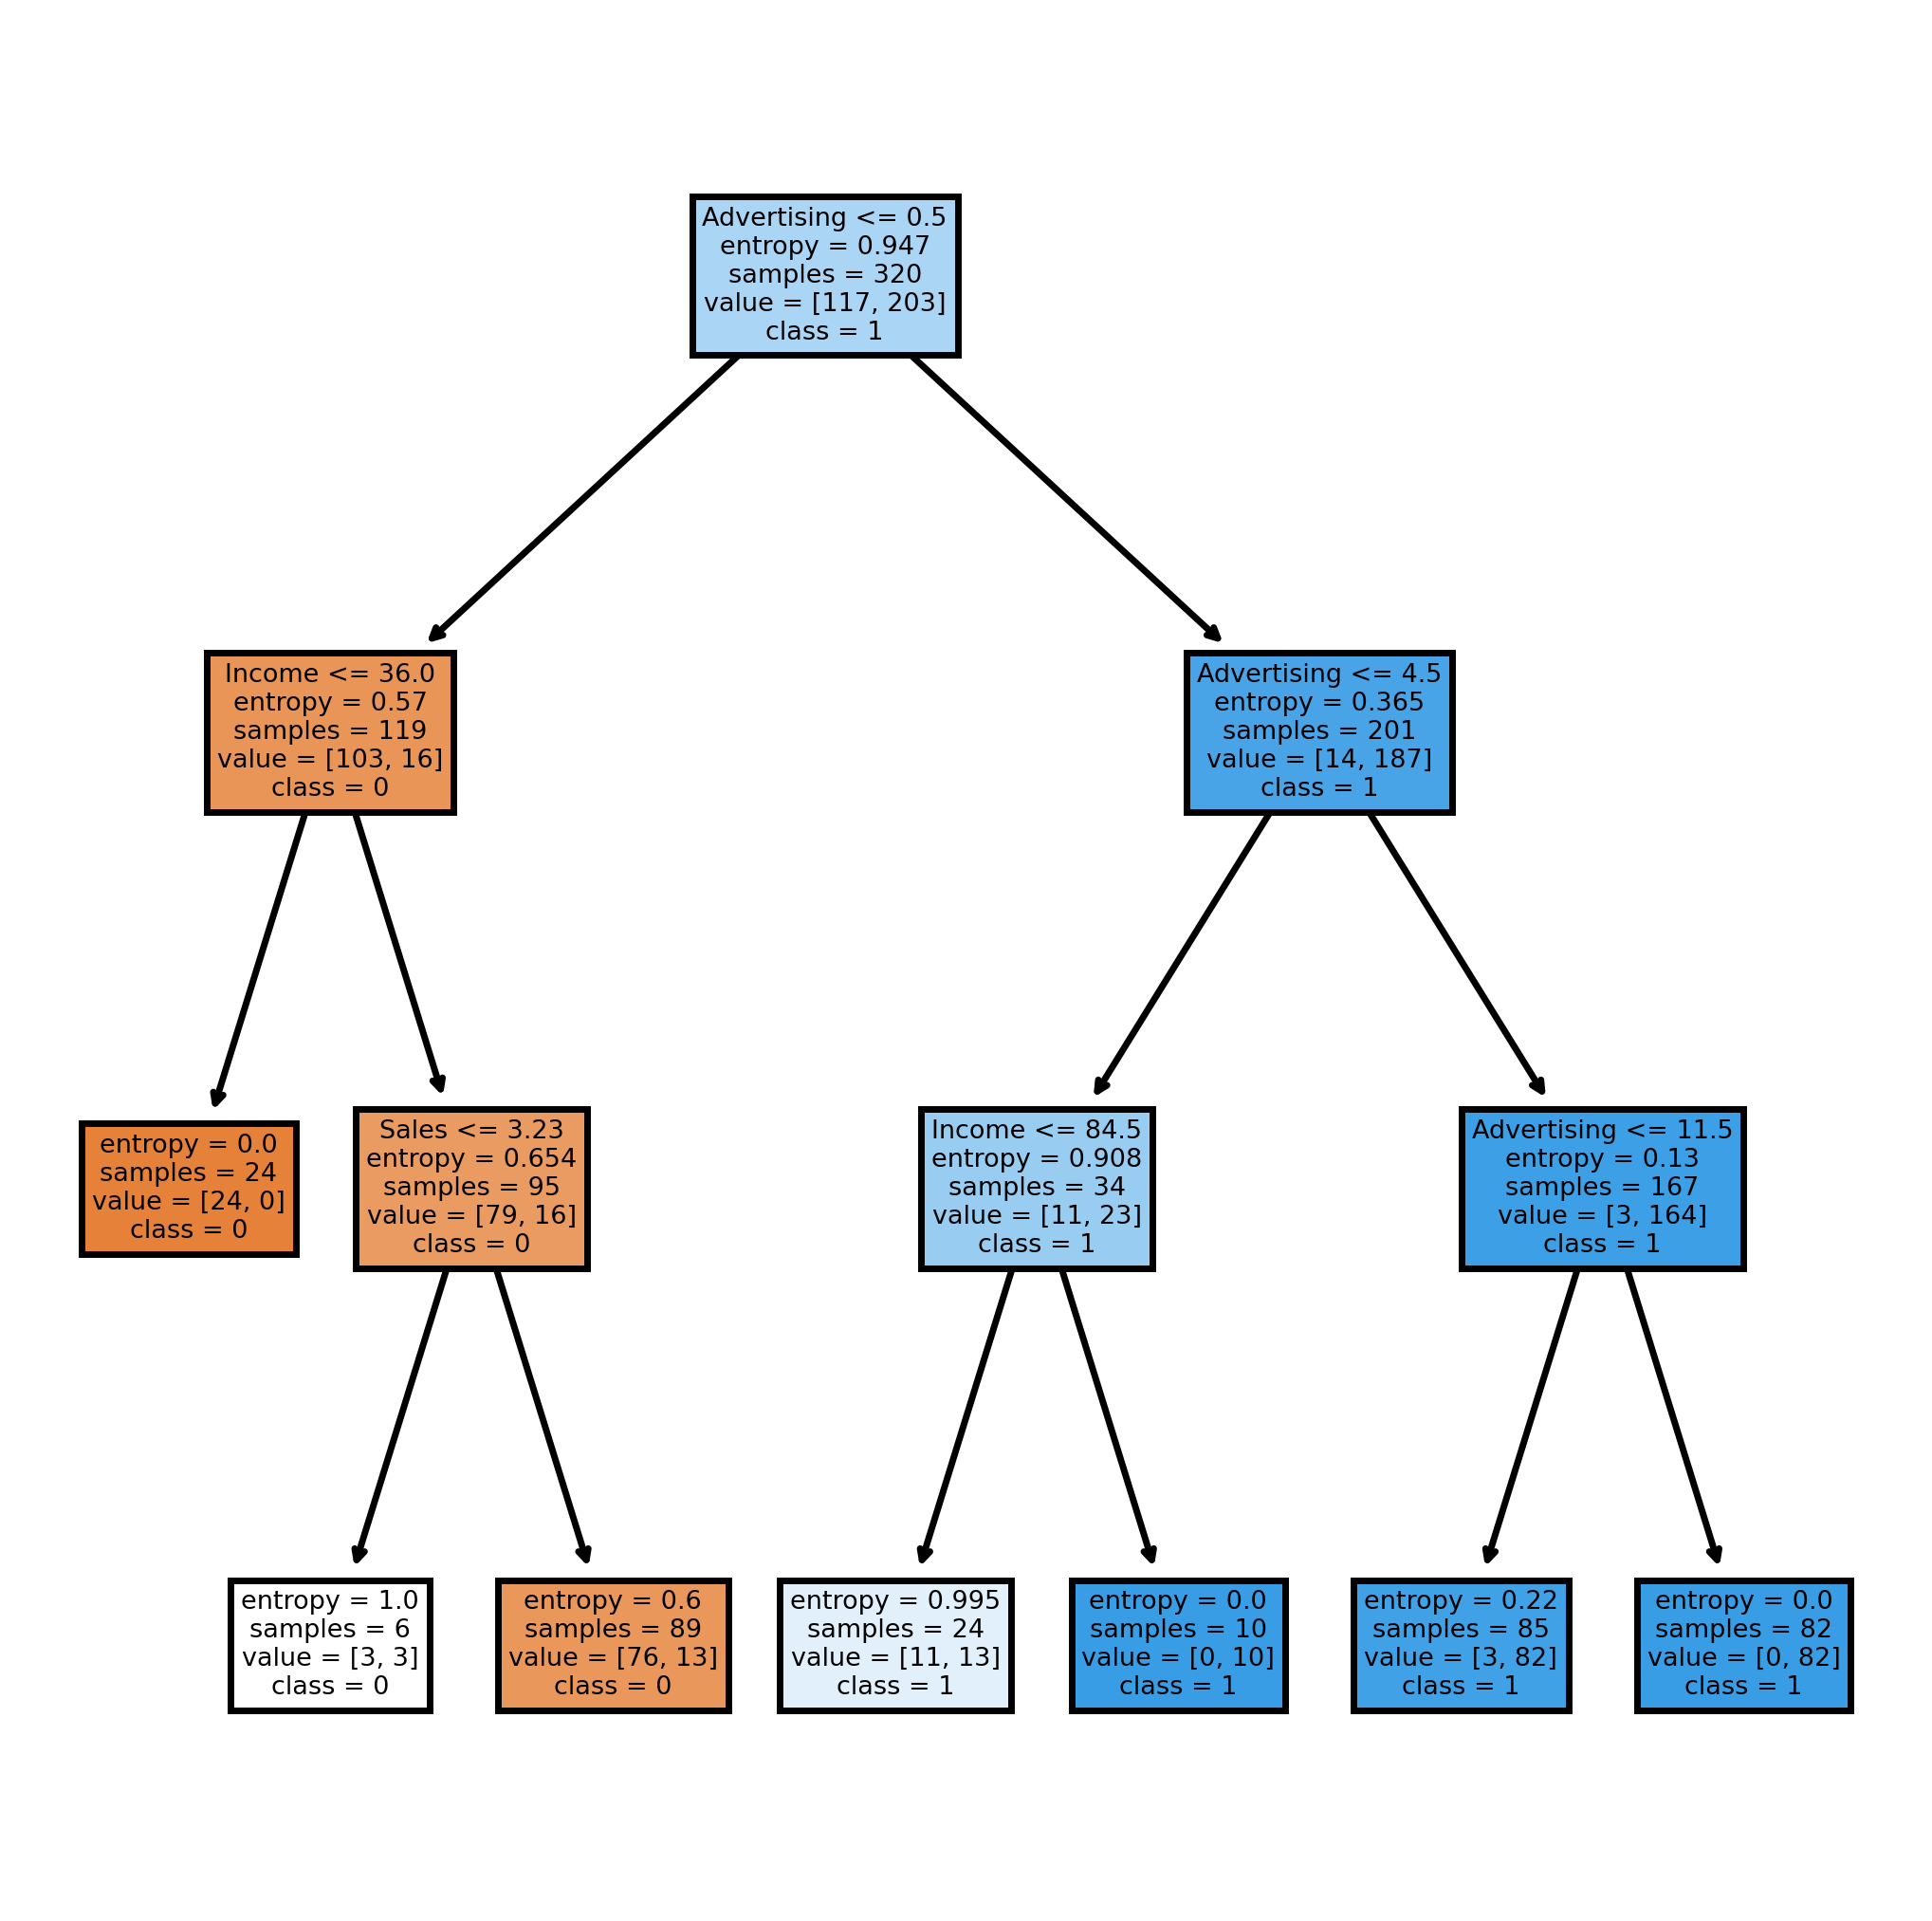

In [312]:
#decision tree
import matplotlib.pyplot as plt

fn=['Sales','CompPrice','Income','Advertising']
cn=['0','1']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(5,5),dpi=500)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True);

In [313]:
#imp features finding 
model.feature_importances_

array([0.01365087, 0.        , 0.06281945, 0.92352968])

In [314]:
import pandas as pd 
features_imp=pd.Series(model.feature_importances_,index=fn).sort_index(ascending=False)
features_imp


Sales          0.013651
Income         0.062819
CompPrice      0.000000
Advertising    0.923530
dtype: float64

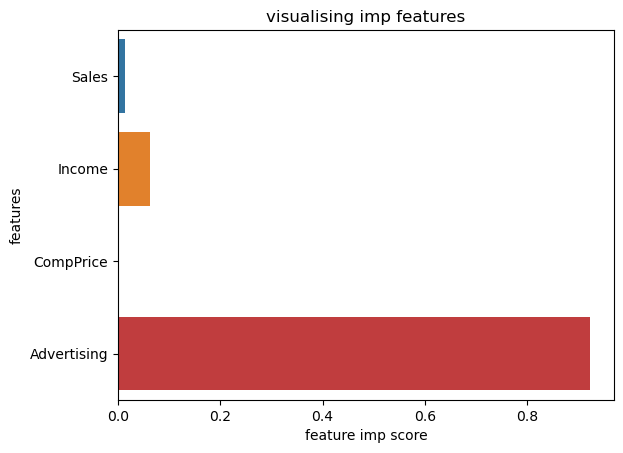

In [315]:
#plot the imp features
import matplotlib.pyplot as plt 
import seaborn as sns
sns.barplot(x=features_imp,y=features_imp.index)
plt.xlabel('feature imp score')
plt.ylabel('features')
plt.title('visualising imp features')
plt.show()

In [316]:
#apply on testing dataset
preds=model.predict(x_test)
pd.Series(preds).value_counts()


1    55
0    25
dtype: int64

In [317]:
#compare actual value with predicted value
pd.crosstab(y_test,preds)

col_0,0,1
US,,
0,22,3
1,3,52


In [318]:
#accuracy
np.mean(preds==y_test)

0.925

# DECISION TREE USING CART
# CLASSIFICATION(companydata)

In [319]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)
model_gini.fit(x_train, y_train)
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)


0.925

# DECISION TREE USING CART
# REGRESSION (companydata)

In [320]:
from sklearn.tree import DecisionTreeRegressor 
array = company.values
X = array[:,0:3] 
y = array[:,3] 

In [321]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)   

In [322]:
model = DecisionTreeRegressor(max_depth = 3)
model.fit(X_train, y_train)  

DecisionTreeRegressor(max_depth=3)

In [323]:
#Find the testing accuracy
model.score(X_test,y_test)  

-0.08140301003067263

In [324]:
#Find the training accuracy
model.score(X_train, y_train)  

0.23768998912365258